<a href="https://colab.research.google.com/github/XiaoweiZhang-0/IEEE-AI-ML/blob/master/Template_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import matplotlib.pylab as plt
import random
import math

tf.compat.v1.disable_eager_execution()

MAX_EPSILON = 1
MIN_EPSILON = 0.01
LAMBDA = 0.0001
GAMMA = 0.99
BATCH_SIZE = 50
num_episodes = 500

print("finished imports")

finished imports


In [ ]:
class Board(object):
  
  def __init__(self):
    self.board = self.resetBoard()
    pass
  
  def resetBoard(self):
    self.board = np.zeros((6,7))
    self.actions = np.zeros(7)
    return self.board
  
  def addToBoard(self, column, player):
    """
    for x in range(0,6):
      if (self.board[5-x][column] == 0):
        self.board[5-x][column] = player
        break
        """
    self.board[5-int(self.actions[column])][column] = player
    self.actions[column] += 1
    return self
  
  def getPossibleMoves(self):
    """
    list = []
    for i in range(7):
        if (self.board[0][i] == 0):
          list.append(i)
          """
    l = np.where(self.actions != 6)[0]
    return l
  
  def isGame(self):
    for i in range(6):
      for j in range (3,7):
        if(self.board[i][j-3] == self.board[i][j-2] and self.board[i][j-3] == self.board[i][j-1] and self.board[i][j-3] == self.board[i][j] and self.board[i][j] != 0):
          return False

    for j in range(7):
      for i in range(3):
        if (self.board[i+3][j] == self.board[i+2][j] and self.board[i+3][j] == self.board[i+1][j] and self.board[i+3][j] == self.board[i][j] and self.board[i][j] != 0):
          return False

    for i in range(3):
      for j in range(7):
        if(j in range(3)):
          if(self.board[i][j] == self.board[i+1][j+1] and self.board[i][j] == self.board[i+2][j+2] and self.board[i][j] == self.board[i+3][j+3] and self.board[i][j] != 0):
            return False
        elif (j in range(4,7)):
          if(self.board[i][j] == self.board[i+1][j-1] and self.board[i][j] == self.board[i+2][j-2] and self.board[i][j] == self.board[i+3][j-3] and self.board[i][j] != 0):
            return False
        else:
          if(self.board[i][j] == self.board[i+1][j+1] and self.board[i][j] == self.board[i+2][j+2] and self.board[i][j] == self.board[i+3][j+3] and self.board[i][j] != 0) or (self.board[i][j] == self.board[i+1][j-1] and self.board[i][j] == self.board[i+2][j-2] and self.board[i][j] == self.board[i+3][j-3] and self.board[i][j] != 0):
            return False

    notFull = False
    for i in range(6):
      for j in range(7):
        if(self.board[i][j] == 0):
          notFull = True

    return notFull
  
  def isDraw(self):
    for i in range(6):
      for j in range (3,7):
        if(self.board[i][j-3] == self.board[i][j-2] and self.board[i][j-3] == self.board[i][j-1] and self.board[i][j-3] == self.board[i][j] and self.board[i][j] != 0):
          return False

    for j in range(7):
      for i in range(3):
        if (self.board[i+3][j] == self.board[i+2][j] and self.board[i+3][j] == self.board[i+1][j] and self.board[i+3][j] == self.board[i][j] and self.board[i][j] != 0):
          return False

    for i in range(3):
      for j in range(7):
        if(j in range(3)):
          if(self.board[i][j] == self.board[i+1][j+1] and self.board[i][j] == self.board[i+2][j+2] and self.board[i][j] == self.board[i+3][j+3] and self.board[i][j] != 0):
            return False
        elif (j in range(4,7)):
          if(self.board[i][j] == self.board[i+1][j-1] and self.board[i][j] == self.board[i+2][j-2] and self.board[i][j] == self.board[i+3][j-3] and self.board[i][j] != 0):
            return False
        else:
          if(self.board[i][j] == self.board[i+1][j+1] and self.board[i][j] == self.board[i+2][j+2] and self.board[i][j] == self.board[i+3][j+3] and self.board[i][j] != 0) or (self.board[i][j] == self.board[i+1][j-1] and self.board[i][j] == self.board[i+2][j-2] and self.board[i][j] == self.board[i+3][j-3] and self.board[i][j] != 0):
            return False
          
    notFull = True
    for i in range(6):
      for j in range(7):
        if(self.board[i][j] == 0):
          notFull = False

    return notFull
  
  def display(self):
    for i in range(6):
      print(self.board[i])
    
    return None

In [ ]:
class Model:
    def __init__(self, num_states, num_actions, batch_size):
        self._num_states = num_states
        self._num_actions = num_actions
        self._batch_size = batch_size
        # define the placeholders
        self._states = None
        self._actions = None
        # the output operations
        self._logits = None
        self._optimizer = None
        self._var_init = None
        # now setup the model
        self.model = None
        self._define_model()
        
    def _define_model(self):
        #self._states = np.empty(shape=[:, self._num_states], dtype=tf.float32)
        #self._q_s_a = np.empty(shape=[:, self._num_actions], dtype=tf.float32)
        # create a couple of fully connected hidden layers
        self.model = Sequential()
        self.model.add(Input(shape=(self._num_states,))) #(6,7)
        """
        put yo layers here
        
        """
        self.model.add(Dense(self._num_actions, activation=None))
        self.model.compile(optimizer="Adam", loss="MSE")
        
    def predict_one(self, state):
        return self.model.predict(state.reshape(1, len(state)), verbose=False)

    def predict_batch(self, states):
        #print(states.shape)
        return self.model.predict_on_batch(states)

    def train_batch(self, x_batch, y_batch):
        self.model.fit(x_batch, y_batch,  verbose=False)

    @property
    def num_states(self):
        return self._num_states

    @property
    def num_actions(self):
        return self._num_actions

    @property
    def batch_size(self):
        return self._batch_size

    @property
    def var_init(self):
        return self._var_init

In [ ]:
class Memory:
    def __init__(self, max_memory):
        self._max_memory = max_memory
        self._samples = []

    def add_sample(self, sample):
        self._samples.append(sample)
        if len(self._samples) > self._max_memory:
            self._samples.pop(0)

    def sample(self, no_samples):
        if no_samples > len(self._samples):
            return random.sample(self._samples, len(self._samples))
        else:
            return random.sample(self._samples, no_samples)

In [ ]:
class GameRunner:
    def __init__(self, model, model2, env, memory, max_eps, min_eps,
                 decay):
        self._env = env
        self._model = model
        self._model2 = model2
        self._memory = memory
        self._max_eps = max_eps
        self._min_eps = min_eps
        self._decay = decay
        self._eps = self._max_eps
        self._steps = 0
        self._reward_store = []
        self._max_x_store = []

    def run(self):
        state = Board()
        tot_reward = 0
        max_x = -100
        player = 0
        while True:

            player %= 2
            if player == 0:
              m = self._model
            else:
              m = self._model2
            
            moves = state.getPossibleMoves()
            action = self._choose_action(state, m)
            if action not in moves:
              action = int(np.random.choice(moves))

            

            next_state = state.addToBoard(action, player + 1)
            done = not next_state.isGame()
            reward = 0
            """
            You can define a heuristic here 
            """

            """
            #Example Heuristic
            Gives reward of 20 if model has 3 in a row vertically
            if not done:
              for j in range(7):
                for i in range(4):
                  if (next_state.board[i][j] == next_state.board[i+2][j] and next_state.board[i][j] == next_state.board[i+1][j] and next_state.board[i][j] == player):
                    reward = 20
            """
            
            if done:
                reward = 100

            self._memory.add_sample((state.board.flatten(), action, reward, next_state.board.flatten()))
            m = self._replay(m)

            # exponentially decay the eps value
            self._steps += 1
            self._eps = MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) \
                                      * math.exp(-LAMBDA * self._steps)

            # move the agent to the next state and accumulate the reward
            state = next_state
            tot_reward += reward

            if player == 0:
              self._model = m
            else:
              self._model2 = m

            player += 1
            # if the game is done, break the loop
            if done:
                self._reward_store.append(tot_reward)
                self._max_x_store.append(max_x)
                break

        print("Step {}, Total reward: {}, Eps: {}".format(self._steps, tot_reward, self._eps))

    def _choose_action(self, state, m):
        if random.random() < self._eps:
            return random.randint(0, self._model.num_actions - 1)
        else:
            return np.argmax(m.predict_one(state.board.flatten()))

    def _replay(self, m):
        batch = self._memory.sample(self._model.batch_size)
        states = np.array([val[0] for val in batch])
        next_states = np.array([(np.zeros(self._model.num_states)
                                 if val[3] is None else val[3]) for val in batch])
        # predict Q(s,a) given the batch of states
        q_s_a = self._model.predict_batch(states)
        # predict Q(s',a') - so that we can do gamma * max(Q(s'a')) below
        q_s_a_d = self._model.predict_batch(next_states)
        # setup training arrays
        x = np.zeros((len(batch), self._model.num_states))
        y = np.zeros((len(batch), self._model.num_actions))
        for i, b in enumerate(batch):
            state, action, reward, next_state = b[0], b[1], b[2], b[3]
            # get the current q values for all actions in state
            current_q = q_s_a[i]
            # update the q value for action
            if next_state is None:
                # in this case, the game completed after action, so there is no max Q(s',a')
                # prediction possible
                current_q[action] = reward
            else:
                current_q[action] = reward + GAMMA * np.amax(q_s_a_d[i])
            x[i] = state
            y[i] = current_q
        m.train_batch(x, y)
        return m

    @property
    def reward_store(self):
        return self._reward_store

    @property
    def max_x_store(self):
        return self._max_x_store


Episode 1 of 500
Step 15, Total reward: 100, Eps: 0.9985161131933338
Step 27, Total reward: 100, Eps: 0.997330605304496
Step 38, Total reward: -100, Eps: 0.9962451387547147
Step 55, Total reward: 100, Eps: 0.9945699463358298
Step 78, Total reward: -100, Eps: 0.9923080376513692
Step 87, Total reward: 100, Eps: 0.9914243581329146
Step 110, Total reward: -100, Eps: 0.9891696759876151
Step 136, Total reward: -100, Eps: 0.9866271415571011
Step 160, Total reward: -100, Eps: 0.9842860468547323
Step 174, Total reward: -100, Eps: 0.9829230007440439
Episode 11 of 500
Step 190, Total reward: -100, Eps: 0.9813675686203779
Step 212, Total reward: -100, Eps: 0.9792329089560232
Step 225, Total reward: 100, Eps: 0.977973724821403
Step 242, Total reward: -100, Eps: 0.9763295674189666
Step 254, Total reward: -100, Eps: 0.9751706674171329
Step 275, Total reward: 100, Eps: 0.9731459357279194
Step 285, Total reward: 100, Eps: 0.9721832712046753
Step 312, Total reward: -100, Eps: 0.9695888803761333
Step 330

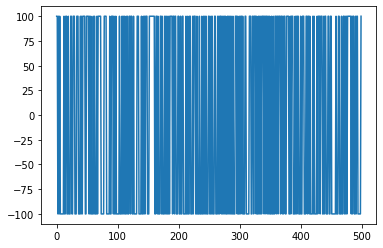

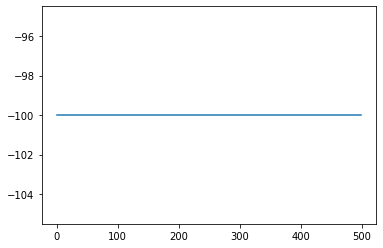

In [ ]:
env = Board()

num_states = 42
num_actions = 7

model = Model(num_states, num_actions, BATCH_SIZE)
model2 = Model(num_states, num_actions, BATCH_SIZE) 
mem = Memory(50000)

gr = GameRunner(model, model2, env, mem, MAX_EPSILON, MIN_EPSILON, LAMBDA)

cnt = 0
while cnt < num_episodes:
    if cnt % 10 == 0:
        print('Episode {} of {}'.format(cnt+1, num_episodes))
    gr.run()
    cnt += 1
plt.plot(gr.reward_store)
plt.show()
plt.close("all")
plt.plot(gr.max_x_store)
plt.show()

In [ ]:
score = [1 if x == 100 else 0 for x in gr.reward_store]
print(np.sum(score))
print(np.sum(score)/num_episodes)

234
0.468


In [ ]:
model = gr._model

In [ ]:
game = Board()
player = True
while(game.isGame()):
 
  if (player):
    x = model.predict_one(game.board.flatten())
    print(x)
    x = np.argmax(x)
    if x not in game.getPossibleMoves():
      x = np.random.choice(game.getPossibleMoves())
    game.addToBoard(x, 1)
  else:
    x = int(input("What column do you want to place a piece? (0-6) "))
    pMoves = game.getPossibleMoves()
    while(x not in pMoves):
      print("That column is not available, available columns are: ")
      print(pMoves)
      x = int(input("What column? "))
    game.addToBoard(x, 2)
  player = not player
  print()
  for i in range(6):
    print(game.board[i])
    
print("Game over")
if (player):
  print("Player 2 Wins!")
else:
  print("Player 1 Wins!")
for i in range(6):
  print(game.board[i])

[[1.8742547 1.6987238 1.8915652 2.04303   1.8722577 1.8762957 2.0416563]]

[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0.]
What column do you want to place a piece? (0-6) 1

[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 2. 0. 1. 0. 0. 0.]
[[4.6209803 4.951044  5.437259  6.5669756 5.22415   4.710411  5.274823 ]]

[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0.]
[0. 2. 0. 1. 0. 0. 0.]
What column do you want to place a piece? (0-6) 1

[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 2. 0. 1. 0. 0. 0.]
[0. 2. 0. 1. 0. 0. 0.]
[[7.129533  6.7752295 7.4169817 8.597     7.791604  8.567998  9.363728 ]]

[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[0. 2. 0. 1. 0. 0. 0.]
[0. 2.

In [ ]:
model = gr._model
model2 = gr._model2

game = Board()
player = True
while(game.isGame()):
 
  if (player):
    x = model.predict_one(game.board.flatten())
    print(x)
    x = np.argmax(x)
    if x not in game.getPossibleMoves():
      x = np.random.choice(game.getPossibleMoves())
    game.addToBoard(x, 1)
  else:
    x = model2.predict_one(game.board.flatten())
    print(x)
    x = np.argmax(x)
    if x not in game.getPossibleMoves():
      x = np.random.choice(game.getPossibleMoves())
    game.addToBoard(x, 2)
  player = not player
  print()
  for i in range(6):
    print(game.board[i])

print("Game over")
if (player):
  print("Player 2 Wins!")
else:
  print("Player 1 Wins!")
for i in range(6):
  print(game.board[i])